<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression as LR

## Загрузка данных

In [2]:
# Загружаем данные
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
# Смотрим на размер сетки и на общую информацию
print(df.shape, '\n')
df.info()

(5000, 5) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


**Как видим в таблице нет пропусков и значения все числовые, но разряд мы понизим.
<br>Так же, сменим названия колонок.
<br>Ну и можно сразу увидеть, что "Пол" и "Страховые выплаты" это категориальные признаки, все остальные количественные**

In [4]:
# помотрим на характер данных
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


**Данные распределяются нормально
<br>Ну и по их диапазону значений, всё же понизим разряд**

In [5]:
# заменим названия колонок
df = df.rename(columns={'Пол' : 'gender', 
                        'Возраст':'age',
                        'Зарплата':'salary', 
                        'Члены семьи':'family_member', 
                        'Страховые выплаты':'insurance_payments'})

In [6]:
# понизим разряд
df = df.astype({'gender':'uint8', 
                'age':'uint8', 
                'salary':'uint32', 
                'family_member':'uint8',
                'insurance_payments':'uint8'}) 

In [7]:
# поищем дубликаты и удалим их
print(f'Количество явных дубликатов :{df.duplicated().sum()}')
df = df.drop_duplicates(ignore_index=True)

Количество явных дубликатов :153


In [8]:
# еще раз взглянем
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              4847 non-null   uint8 
 1   age                 4847 non-null   uint8 
 2   salary              4847 non-null   uint32
 3   family_member       4847 non-null   uint8 
 4   insurance_payments  4847 non-null   uint8 
dtypes: uint32(1), uint8(4)
memory usage: 38.0 KB


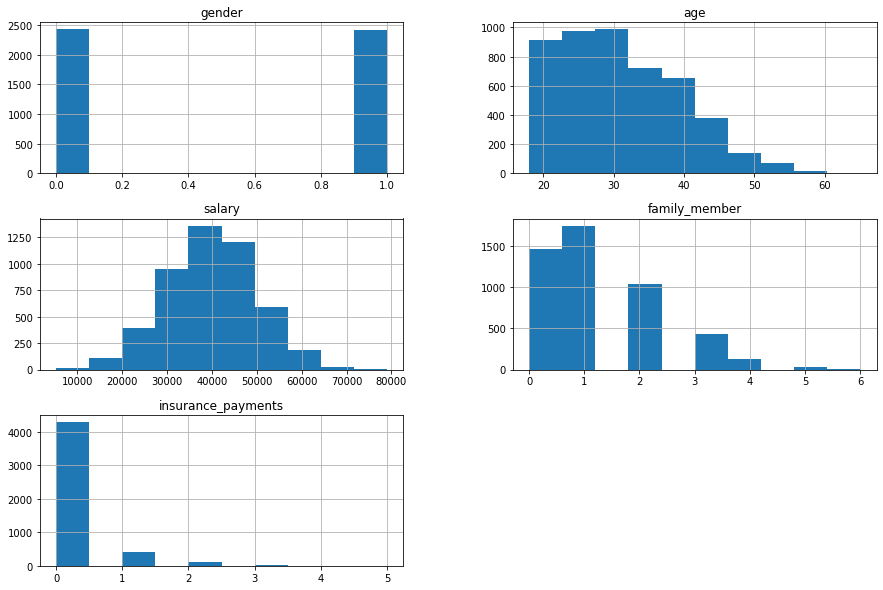

In [9]:
# построим графики
df.hist(figsize=(15,10));

**Данные выглядят хорошо, можно их разбить для последующего обучения**

In [10]:
X = df.drop('insurance_payments', axis=1)
y = df['insurance_payments']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12345)

In [11]:
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (2908, 4)
Размер тестовой выборки: (1939, 4)


**Были произведены следующие действия:
<br>1) Открыли файл и посмотрели на количество, и распределения данных
<br>2) Затем переименовали столбцы и понизили разряд, для удобной работы и с меньшим затратом памяти
<br>3) Избавились от дубликатов
<br>4) И посмотрели визуально на нормальное распределение данных**

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

# Вопрос:
# Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** Нет. Если исходный набор данных умножить на обратимую матрицу, то результат линейной регрессии не изменится

**Эмпирическое обоснование**

In [12]:
# Линейная регрессия
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [13]:
# смотрим на результат обучения исходного набора данных
model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

r2 = r2_score(y_test, predict)

print("r2_score:", r2)

r2_score: 0.4272661343686206


In [14]:
# создадим произвольную матрицу P
np.random.seed(12345)
p = np.random.normal(size=(4,4))
p

array([[-0.20470766,  0.47894334, -0.51943872, -0.5557303 ],
       [ 1.96578057,  1.39340583,  0.09290788,  0.28174615],
       [ 0.76902257,  1.24643474,  1.00718936, -1.29622111],
       [ 0.27499163,  0.22891288,  1.35291684,  0.88642934]])

In [15]:
# проверим на обратимость
np.linalg.inv(p)

array([[-1.31136747,  0.3921804 ,  0.18868055, -0.67088287],
       [ 1.75872714,  0.14106138, -0.17773045,  0.79787127],
       [-0.41702659, -0.22854768,  0.3550602 ,  0.33039819],
       [ 0.58912996,  0.19073027, -0.5545481 ,  0.6259302 ]])

In [16]:
# перемножим выборки на матрицу
X_train_p = X_train @ p
X_train_p.columns = X_train.columns

X_test_p = X_test @ p
X_test_p.columns = X_test.columns

In [17]:
# смотрим результат обучения измененного набора данных
model = LinearRegression()
model.fit(X_train_p, y_train)
predict = model.predict(X_test_p)

r2_p = r2_score(y_test, predict)

print("r2_score:", r2_p)

r2_score: 0.427266121354394


In [18]:
# сравниваем результаты
if round(r2, 3) == round(r2_p, 3):
    print('Результаты равны r2 = r2_p:')
    print(f'{r2:.3} = {r2_p:.3}')
else:
    print('Результаты не равны')
    print('Беда')

Результаты равны r2 = r2_p:
0.427 = 0.427


**Теоретичесоке обоснование:** 
<br>Создадим матрицу из исходной и домноженной на обратимую    

$$Z = XP$$

где $X$ - матрица признаков,
$P$ - обратимая матрица 

Формула предсказаний

$$a = Xw$$

Формула обучения

$$w = (X^T X)^{-1} X^T y$$

И для домноженной
$$a1 = Zw1$$

$$w1 = (Z^T Z)^{-1} Z^T y = ((XP)^T XP)^{-1} (XP)^T y = (P^TX^TXP)^{-1} (XP)^T y  
= P^{-1}(X^TX)^{-1}(P^T)^{-1} (XP)^T y$$

Для обоснования докажем равенство 
Совершая несложные математические действия с раскрытием скобок и сокращений

$$a = a1$$

$$Xw = Zw1$$

$$X(X^T X)^{-1} X^T y = XP P^{-1}(X^TX)^{-1}(P^T)^{-1} (XP)^T y $$

$$X X^T  = XP P^{-1}(P^T)^{-1} (XP)^T $$


$$X^T  = P P^{-1}(P^T)^{-1} (XP)^T $$

$$X^T  = (P^T)^{-1} (XP)^T $$

$$X^T  = (P^T)^{-1}  P^T X^T $$

$$ X^T  =  X^T $$

ЧТД

## Алгоритм преобразования

**Алгоритм**

Для защиты информации на этапе поиска коэффициентов и предсказаний линейной регрессии, будем умножать матрицу признаков на обратимую матрицу $P$, которая будет генерироваться случайным образом.

Этапы алгоритма:

1) Составление матрицы 

2) Проверка матрицы на обратимость. 

3) Получение матрицы преобразованных признаков 

4) Применение алгоритма на преобразованных признаках 


**Обоснование**
После доказательства того, что результаты прогноза не изменятся если домножить данные на обратимую матрицу, то данным алгоритмом можно зашифровать данные


## Проверка алгоритма

**Проверку алгоритма осуществил на этапе доказательства утверждения, рассмотрим теперь алгоритм из sklearn**

In [19]:
p = np.random.normal(size=(4,4))
np.linalg.inv(p)

X_train_p = X_train @ p
X_train_p.columns = X_train.columns
X_test_p = X_test @ p
X_test_p.columns = X_test.columns

model = LR()
model.fit(X_train_p, y_train)
predict = model.predict(X_test_p)

r2_p = r2_score(y_test, predict)

if round(r2, 3) == round(r2_p, 3):
    print('Результаты равны r2 = r2_p:')
    print(f'{r2:.3} = {r2_p:.3}')
else:
    print('Результаты не равны')
    print('Беда')

Результаты равны r2 = r2_p:
0.427 = 0.427


**Проверим возможность декодировать данные**

In [20]:
display(round(X_train_p @ np.linalg.inv(p)).astype(int))
round(X_train_p @ np.linalg.inv(p)).astype(int).values == X_train.values

,0,1,2,3
3988,0,45,37700,3
972,0,45,39900,0
66,1,43,57200,4
3968,0,19,40100,3
4563,0,26,36700,2
...,...,...,...,...
3497,1,23,28200,1
3492,0,30,33700,1
2177,1,20,28900,1
3557,1,33,38800,1


array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       ...,
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

**Как видим, возможность такая имеется=)**

$$\blacksquare$$

## Вывод

**В ходе работы были получены следующие результаты:
<br> 1) Были рассмотрены данные, которые в целом не требовали вмешательств, но слегка были причёсаны
<br> 2) Был рассмотрен алгорит шифрования данных пользователей, в котором требуется домножать исходные данные на случайную матрицу
<br> 3) Было доказано, как теоретическим, так и практическим путем, что при изменении данных случайной матрицой $P$ резальтат предсказания линейной регрессии не изменялся
<br> 4) Алгоритм из sklearn, как ни странно, работает по тому же принципу**

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования